## Analysis Notebook, CST Assignment and Figures

### This notebook contains:

CST Assignment for Estrous cycle staging study

CST Assignment for GBS Pathogen Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics

%matplotlib inline

In [2]:
#Reading in the mapping files for both studies

mapping_Estrous = pd.read_table('Raw_Files_Estrous_Stage/Qiime_Mapping_File.txt', index_col=0)

mapping_GBS = pd.read_table('Raw_Files_GBS_Challenge/Qiime_Mapping_File_GBS_Pathogen_Challenge.txt', index_col=0)

In [3]:
#Reading in the tables for both studies

table_Estrous = pd.read_table('Results_Files_Estrous_Stage/reference_hit_updated_ContaminationRemoved_400Rare.txt', 
                              header=1, index_col=0)

table_GBS = pd.read_table('Results_Files_GBS_Challenge/reference_hit_updated_ContaminationRemoved_GBS_PBS_500Rare.txt',
                          header=1, index_col=0)

#Inverting the tables

table_Estrous = table_Estrous.T

table_GBS = table_GBS.T

### CST Assignment Estrous Cycle Staging Study

Hierarchial Clustering was performed with help from this excellent blog post by Jörn Hees:

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [4]:
#Hierarchial Clustering, see scipy.cluster.hierarchy.linkage for more information

eucledian_Estrous = linkage(table_Estrous, method='ward', metric='euclidean')

In [5]:
#Code is from blog post noted above, by Jörn Hees

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

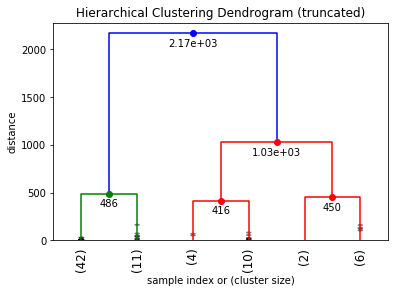

In [6]:
#Code is from blog post noted above, by Jörn Hees
#Visualization of the clusters

fancy_dendrogram(
    eucledian_Estrous,
    truncate_mode='lastp',
    p=6,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  
)
plt.show()

In [7]:
#CST Assignments

euc_cluster = fcluster(eucledian_Estrous, 5, criterion='maxclust')

euc_cluster_4 = fcluster(eucledian_Estrous, 4, criterion='maxclust')

In [8]:
#Checking the silhouette score of the assignments

print(metrics.silhouette_score(table_Estrous, euc_cluster, metric='euclidean'))
print(metrics.silhouette_score(table_Estrous, euc_cluster_4, metric='euclidean'))

0.726174584044
0.713292514464


In [9]:
#Creating a dataframe from the CST Assignments

order = table_Estrous.index

label = ['CST_Euc']

Estrous_Study_CST = pd.DataFrame(euc_cluster, index=order, columns=label)

In [10]:
#Appending these assingments to a new mapping file

mapping_Estrous_update = pd.merge(mapping_Estrous, Estrous_Study_CST, left_index=True, right_index=True)

#Writing this to a .txt file

mapping_Estrous_update.to_csv('Qiime_Mapping_File_Estrous_Staging_CST.txt', sep='\t')

This updated mapping file was then edited to add other categories for comparison 

### CST Assignment for GBS Pathogen Challenge

In [13]:
#Hierarchial Clustering, see scipy.cluster.hierarchy.linkage for more information

eucledian_GBS = linkage(table_GBS, method='ward', metric='euclidean')

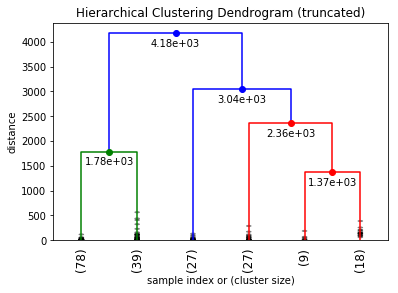

In [14]:
#Code is from blog post noted above, by Jörn Hees
#Visualization of the clusters

fancy_dendrogram(
    eucledian_GBS,
    truncate_mode='lastp',
    p=6,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  
)
plt.show()

In [15]:
#CST Assignments

euc_cluster_GBS = fcluster(eucledian_GBS, 6, criterion='maxclust')

euc_cluster_GBS_5 = fcluster(eucledian_GBS, 5, criterion='maxclust')

euc_cluster_GBS_4 = fcluster(eucledian_GBS, 4, criterion='maxclust')


In [16]:
#Checking the silhouette score of the assignments

print(metrics.silhouette_score(table_GBS, euc_cluster_GBS, metric='euclidean'))
print(metrics.silhouette_score(table_GBS, euc_cluster_GBS_5, metric='euclidean'))
print(metrics.silhouette_score(table_GBS, euc_cluster_GBS_4, metric='euclidean'))

0.672993580535
0.639866149799
0.646010512947


In [17]:
#Creating a dataframe from the CST Assignments

order = table_GBS.index

label = ['CST_Euc']

GBS_Study_CST = pd.DataFrame(euc_cluster_GBS, index=order, columns=label)

In [19]:
#Appending these assingments to a new mapping file

mapping_GBS_update = pd.merge(mapping_GBS, GBS_Study_CST, left_index=True, right_index=True)

#Writing this to a .txt file

mapping_GBS_update.to_csv('Qiime_Mapping_File_GBS_Pathogen_Challenge_CST.txt', sep='\t')

### NOTE: to make CST labels consistent between studies, the GBS CST was renamed "6", and other labels were swapped to be consistent with the staging study:

CST I: Staphylococcus dominant

CST II: Enterococcus - Staphylococcus mix

CST III: Enterococcus dominant 

CST IV: Lactobacillus dominant

CST V: High alpha diversity, misc bacteria

CST VI: Streptococcus dominant (GBS)

The CST name/label has no bearing on how related the CSTs are with Eucledian clustering, they are just names. Label order is not forced on the merged heatmap

This updated mapping file was then edited to add other categories for comparison

In [21]:
#Getting the siloutte score for the merged studies

table_Merged_Rare = pd.read_table('Merged_Studies/Merged_Table_Contamination_Removed_500Rare.txt',
                                 header=1, index_col=0)

In [22]:
table_Merged_Rare = table_Merged_Rare.T

In [23]:
eucledian_Merged = linkage(table_Merged_Rare, method='ward', metric='euclidean')

In [24]:
eucledian_Merged_cluster = fcluster(eucledian_Merged, 6, criterion='maxclust')

In [25]:
print(metrics.silhouette_score(table_Merged_Rare, eucledian_Merged_cluster, metric='euclidean'))

0.69679849626
